# Modeling and Simulation 7 - Linear Programming

Linear programming (also known as linear optimization) is a mathematical method used to achieve the best outcome in a mathematical model whose requirements are represented by linear relationships.

In more concrete terms, linear programming is about optimizing (maximizing or minimizing) a linear objective function that's subject to a set of linear equality or inequality constraints.

The "linear" part of linear programming indicates that all of the functions in this setting—both the objective function and the constraints—are linear.

The standard form of a linear programming problem is as follows:

1. Maximize: c^T * x

2. Subject to: A * x <= b and x >= 0

Here:

- x represents the vector of variables (to be determined)
- c and b are vectors of known coefficients
- A is a known matrix of coefficients
- The inequality A * x <= b means that each constraint (row in matrix A) should be less than or equal to the corresponding value in vector b
- x >= 0 means that all variables should be non-negative

Constraints are the set of conditions that the solution to the optimization problem must satisfy.

These constraints are typically a system of linear equalities or inequalities that limit the values of the decision variables, which are the variables that you are trying to determine in the optimization problem.

For example, consider a simple linear optimization problem where a company wants to maximize its profit by selling two products, A and B. The profit that the company makes from each product is represented by the objective function:

$$ Maximize P = 5A + 3B $$

where P is the profit, and A and B are the quantities of product A and B that are sold, respectively.

The company might be constrained by the amount of raw materials available to produce each product, and by the production capacity of its factory. These constraints could be represented by the following inequalities:

$$ 2A + B <= 100  (\text{raw materials constraint}) $$
$$ A + 2B <= 80   (\text{production capacity constraint}) $$

In these constraints, the left-hand side represents the amount of each resource (raw materials or production capacity) used to produce a given quantity of products A and B, and the right-hand side represents the total amount of each resource available.

The constraints define the feasible region of the problem, which is the set of all possible combinations of A and B that satisfy all the constraints. The optimal solution to the problem (the values of A and B that maximize the profit P) must lie within this feasible region.

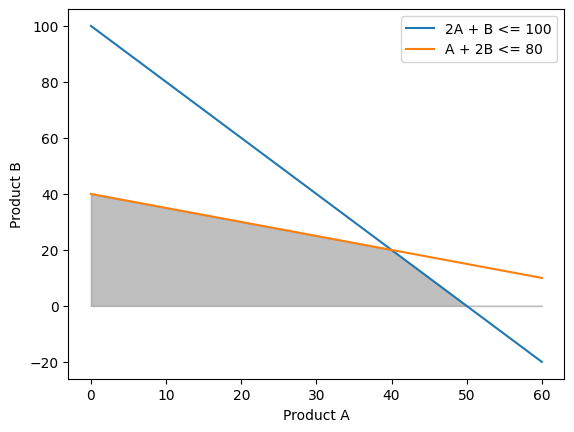

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraint lines
x = np.linspace(0, 60, 400)  # range of x (Product A) values

y1 = (100 - 2*x)  # raw materials constraint
y2 = (80 - x) / 2  # production capacity constraint

# Create the plot
plt.figure()

# Plot the constraints
plt.plot(x, y1, label='2A + B <= 100')
plt.plot(x, y2, label='A + 2B <= 80')

# Shade the feasible region
plt.fill_between(x, np.maximum(0, np.minimum(y1, y2)), color='gray', alpha=0.5)

# Set the x and y axis labels
plt.xlabel('Product A')
plt.ylabel('Product B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Linear programming problems have special properties that allow us to use specialized methods that can be more efficient than classical gradient-based methods. Here's why:

1. Convexity: Linear programming problems are convex, meaning they have a bowl-shaped feasible region with a single global minimum or maximum (depending on whether the problem is a minimization or maximization problem). This property allows us to use methods that are guaranteed to find the global optimum, unlike gradient-based methods, which can sometimes get stuck in local optima in non-convex problems.

2. Corner-point property: In a linear programming problem, the optimal solution always lies at an extreme point (corner) of the feasible region. This property allows us to use methods like the simplex method, which works by moving from one extreme point to another, rather than searching the entire feasible region.

3. Sparsity and structure: Many linear programming problems arising in practice are sparse (i.e., most of the coefficients in the constraint matrix are zero) and have a special structure. Specialized algorithms can take advantage of this sparsity and structure to solve the problem more efficiently.

4. Speed and scalability: Specialized linear programming algorithms like the simplex method and interior-point methods are typically faster and more scalable than gradient-based methods for large-scale linear programming problems.

5. Deterministic solution: Methods like simplex provide a deterministic solution, i.e., running the algorithm multiple times on the same problem will yield the same solution. In contrast, gradient-based methods can be sensitive to the choice of initial point and step size, and may yield different solutions in different runs.

6. Inherent limitations of gradient-based methods: Gradient-based methods require the objective function to be differentiable. However, the objective function of a linear programming problem is a piecewise constant function, which is not differentiable. Furthermore, the feasible region of a linear programming problem is a polyhedron, which has "corners" where the gradient is not defined.

While gradient-based methods are widely used and very effective for many types of optimization problems, the special properties of linear programming problems make specialized methods the preferred choice for these problems.

The most common and simple methods used to solve linear programming problems are:
- Simplex Method: This is a popular algorithm used for solving linear programming problems. It starts from a feasible solution and then iteratively moves to adjacent feasible solutions with non-decreasing objective function values until it reaches an optimal solution.

- Dual Simplex Method: This method is used when a problem does not have an initial feasible solution. It finds an optimal solution by moving from one infeasible solution to another, reducing infeasibility at each step, until it reaches a feasible and optimal solution.

- Interior-Point Method: This method doesn't operate on the boundaries (like the simplex method), but traverses through the interior of the feasible region. It has better worst-case time complexity than the simplex method and works well for large-scale problems.

- Ellipsoid Method: This is a method that, in theory, can solve any linear programming problem to any degree of accuracy, but it tends to be slow and is more of theoretical interest.

In this lab we will focus on the Simplex method, as it is the simplest one to understand and implement.

## The Simplex Method
<img src="attachment:bab3e24a-bdc1-479c-9971-c381291a54ad.png" alt="image.png" style="width:30%; height:30%;">

The Simplex method was developed by George Dantzig in 1947. The Simplex method is an iterative procedure that moves from one feasible solution to another, at each step improving the value of the objective function. Here's an outline of the Simplex method:

1. Initialization: Start with a feasible solution. This is often achieved by introducing slack variables to transform the inequality constraints into equalities. This forms the initial "Simplex tableau".

2. Optimality check: Check if the current solution is optimal. This is done by looking at the coefficients of the objective function in the last row of the Simplex tableau. If all the coefficients are non-negative (for a maximization problem), or non-positive (for a minimization problem), then the current solution is optimal, and the procedure stops. If not, proceed to the next step.

3. Pivot column selection (Entering variable selection): Choose a non-basic variable to enter the basis. This is usually done by applying the maximum (or minimum) coefficient rule or Bland's rule, which says to choose the variable with the most negative coefficient in the last row of the tableau (for a maximization problem), or the most positive coefficient (for a minimization problem).

4. Pivot row selection (Leaving variable selection): Determine which variable should leave the basis to maintain feasibility. This is done by applying the minimum ratio test, which says to divide the right-hand side of the tableau by the corresponding elements in the pivot column, and choose the row with the smallest non-negative ratio.

5. Pivoting: Update the tableau by performing row operations to get a 1 in the pivot position and zeros elsewhere in the pivot column. This changes the basic solution.

6. Return to step 2.

It's important to note that the Simplex method is not guaranteed to terminate in a finite number of steps for all problems, because it can potentially cycle forever. However, there are various pivot rules (like Bland's rule) that can prevent cycling and ensure termination.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We'll go with a "Build your own adventure" thing for this lab. 
- Choose 2 float coefficients that will determine the `objective function` applied on your solution space. You can go with more, but you won't be able to visualize them later.
- After that, choose your coefficients (again, floats) for the inequalities. Let's go with 3 constraints, so that this matrix will need to be 3x2
- Lastly, choose the Right-Hand-Side values (free variables) of the inequalities. Should be a 1x3 vector.

If you don't like to choose, go with these values:
c = [3, 2];
A = [[1, -1], [3, 1], [4, 3]];
b = [2, 5, 7]

In [4]:
c = np.array([3, 2], dtype=float)  # Coefficients for the objective function
A = np.array([[1, -1], [3, 1], [4, 3]], dtype=float)  # Coefficients for the inequalities
b = np.array([2, 5, 7], dtype=float)  # RHS values for the inequalities

Let's now visualise the constrained space, and how the objective function maps on it.

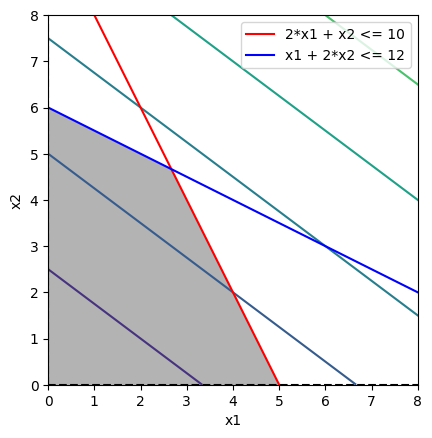

In [24]:
# Create a grid of x1 and x2 values
x1 = np.linspace(0, 10, 400)
x2 = np.linspace(0, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define the constraints
constraint1 = 2*X1 + X2 <= 10
constraint2 = X1 + 2*X2 <= 12
constraint3 = X1 >= 0
constraint4 = X2 >= 0

# Combine the constraints using logical AND
region = np.logical_and.reduce((constraint1, constraint2, constraint3, constraint4))

# Create the plot
plt.figure()

# Plot the constrained region
plt.imshow(region, extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin='lower', cmap='Greys', alpha=0.3)

# Plot the contour of the objective function
Z = 3*X1 + 4*X2  # Objective function
plt.contour(X1, X2, Z, cmap='viridis')

# Plot the constraints
plt.plot(x1, 10 - 2*x1, label='2*x1 + x2 <= 10', color='red')
plt.plot(x1, (12 - x1) / 2, label='x1 + 2*x2 <= 12', color='blue')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

# Set the x and y axis labels
plt.xlabel('x1')
plt.ylabel('x2')

# Set the limits of the plot
plt.xlim(0, 8)
plt.ylim(0, 8)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<details>
<summary>How your plot should look like</summary>

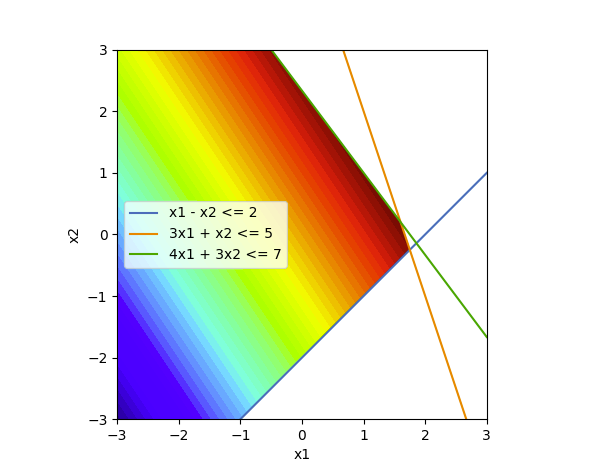
</details>

Now, we'll implement the Simplex method. Here is a recap of the main steps of the algorithm:
1. Initialization: The code starts by determining the number of variables and the number of constraints. It then initializes a "tableau" to represent the linear program. The tableau is a matrix that combines the coefficients of the constraints, the right-hand side values of the constraints, the coefficients of the objective function, and an identity matrix representing the slack variables. These slack variables are introduced to turn inequality constraints into equalities, which makes the problem easier to solve.

2. Main loop: The main part of the Simplex method is an iterative process that continues until an optimal solution is found. The condition for this loop is any(tableau[-1, :-1] > 0). This condition checks if any of the coefficients of the objective function in the last row of the tableau are positive. If they are, it means we can still improve the objective function value by increasing the corresponding variables.

3. Pivot column selection: The first step inside the loop is to choose a pivot column. This is done using pivot_col = np.argmax(tableau[-1, :-1]). The pivot column is the one with the largest coefficient in the objective function row, because increasing the corresponding variable will lead to the largest improvement in the objective function.

4. Pivot row selection: Next, we need to determine which variable should leave the basis to maintain feasibility. This is done with ratios = tableau[:-1, -1] / tableau[:-1, pivot_col]. The ratios are calculated by dividing the right-hand side of the tableau by the corresponding elements in the pivot column. The variable corresponding to the smallest non-negative ratio is selected to leave the basis.

5. Pivoting: After selecting the pivot row and column, we perform the pivot operation. This involves two steps: first, we scale the pivot row so that the pivot element is 1 (tableau[pivot_row, :] /= tableau[pivot_row, pivot_col]). Then, we subtract multiples of the pivot row from all other rows to get zeros in all other positions of the pivot column. This changes the basic solution.

6. Solution extraction: After the main loop terminates, we have an optimal solution to the problem. However, this solution is in the form of a tableau, so we need to extract the variable values. We do this by iterating over each variable, checking if it is a basic variable (it enters the basis), and if so, setting its value to the corresponding right-hand side value in the tableau.

In this visual representation of the tableau:


row  | x1  x2  x3  s1  s2  s3 | RHS |
------------------------------------
   0 |  0   0   0   0   0   0 |  0  |
------------------------------------
   1 |  0   0   0   0   0   0 |  0  |
------------------------------------
   2 |  0   0   0   0   0   0 |  0  |
------------------------------------
   3* |  0   0   0   0   0   0 |  0  |
------------------------------------

- The rows represent the constraints, including the slack variables.
- The columns represent the decision variables, including the slack variables.
- The bottom row* represents the coefficients of the objective function.
- The right-most column represents the right-hand side (RHS) values of the constraints.

At the beginning, all the elements in the tableau are initialized to zero.

In [18]:
def simplex_method(c, A, b):
    num_vars = len(c)  # Number of variables
    num_constraints = len(b)  # Number of constraints
    
    # Initialize an empty tableau of size num_constraints+1 x num_vars + num_constraints+1
    tableau = np.zeros((num_constraints + 1, num_vars + num_constraints + 1))

    # Fill the tableau according to the schema
    tableau[:-1, :num_vars] = A
    tableau[:-1, -1] = b
    tableau[-1, :num_vars] = c
    tableau[np.arange(num_constraints), np.arange(num_vars, num_vars + num_constraints)] = -1  # Assigning -1 to the slack variables

    # Main loop
    while any(tableau[-1, :-1] < 0):
        # Choose pivot's column to be the one with the largest reduced cost
        pivot_col = np.argmax(tableau[-1, :-1] < 0)

        # Compute the ratio of each element on the pivot's column and all coefficients. If any ratio is negative, mark it as infinite.
        ratios = tableau[:-1, -1] / tableau[:-1, pivot_col]
        ratios[tableau[:-1, pivot_col] <= 0] = np.inf

        # Select the row of the pivot to be the one with the minimum ratio
        pivot_row = np.argmin(ratios)

        # Divide its whole row to the value of the pivot
        pivot_val = tableau[pivot_row, pivot_col]
        tableau[pivot_row, :] /= pivot_val

        # For all other rows, subtract the row of the pivot multiplied by tableau[row, pivot_col]
        for i in range(len(tableau)):
            if i != pivot_row:
                tableau[i, :] -= tableau[i, pivot_col] * tableau[pivot_row, :]

    # Return solution
    solution = np.zeros(num_vars)
    for col in range(num_vars):
        if 1 in tableau[:-1, col]:  # Check if the variable enters the basis
            solution_row = tableau[:, col] == 1
            solution[col] = tableau[solution_row, -1][0]
    return solution

# Solve problem
c = [3, 2]
A = np.array([[1, -1], [3, 1], [4, 3]])
b = [2, 5, 7]
solution = simplex_method(c, A, b)
print('Solution:', solution)


Solution: [2. 5.]


Lastly, we can double check the result using the linprog

In [21]:
from scipy.optimize import linprog
import numpy as np

# Define the problem
c = np.array([3, 2], dtype=float)  # Coefficients for the objective function
A = np.array([[1, -1], [3, 1], [4, 3]], dtype=float)  # Coefficients for the inequalities
b = np.array([2, 5, 7], dtype=float)  # RHS values for the inequalities

# Call linprog
res = linprog(c, A_ub=A, b_ub=b, method='simplex')

print('Solution using custom simplex method:', simplex_method(c, A, b))
print('Solution using linprog:', res.x)


Solution using custom simplex method: [2. 5.]
Solution using linprog: [0. 0.]


/tmp/ipykernel_26839/3568838029.py:10: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='simplex')
